In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from pycaret.regression import *

In [2]:
df_treated = pd.read_csv('data/df_treated.csv').set_index('date')
df_treated.index = pd.to_datetime(df_treated.index)

Nov_df = pd.read_csv('data/Nov_df.csv').set_index('date')
Nov_df.index = pd.to_datetime(Nov_df.index)

In [3]:
numeric_col = ['Building0', 'Building1', 'Building3', 'Building4', 'Building5',
                   'Building6', 'Solar0', 'Solar1', 'Solar2', 'Solar3', 'Solar4', 'Solar5',
                   'temperature', 'dewpoint_temperature', 'wind_speed',
                   'mean_sea_level_pressure', 'relative_humidity_01',
                   'surface_solar_radiation', 'surface_thermal_radiation',
                   'total_cloud_cover']
df_treated[numeric_col] = df_treated[numeric_col].apply(pd.to_numeric)
df_numerics = df_treated[numeric_col]

categorical_col = ['COVID', 'Break', 'Semester', 'Exams', 'Monash_occupancy',
               'month', 'day', 'hour']
df_treated[categorical_col] = df_treated[categorical_col].astype('category')
df_categorical = df_treated[categorical_col]

In [4]:
df_hour = df_treated.resample('H').last()
Nov_hour = Nov_df.resample('H').last()

## Buildings

In [5]:
y_train = df_hour[:'2020-09-21 14:00:00']
y_test = df_hour['2020-09-21 15:00:00':]

print(y_train.shape, y_test.shape)
y_train.shape[0] + y_test.shape[0]

(8727, 28) (969, 28)


9696

### PyCaret

In [6]:
s = setup(data=y_train, test_data=y_test, target='Building0', fold_strategy='timeseries', 
          fold=3, transform_target=False, session_id=123)

,Description,Value
0,session_id,123
1,Target,Building0
2,Original Data,"(8727, 28)"
3,Missing Values,True
4,Numeric Features,19
5,Categorical Features,8
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(8727, 98)"


In [7]:
best = compare_models(sort='MAPE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
en,Elastic Net,32.8180,1611.4663,40.0402,0.0076,0.2905,0.3826,0.0600
lasso,Lasso Regression,31.5929,1525.6016,38.9805,0.0159,0.2901,0.4041,0.5300
huber,Huber Regressor,29.1956,1442.4522,37.7243,0.2218,0.3049,0.5718,0.2567
lightgbm,Light Gradient Boosting Machine,31.3685,1699.2285,40.0848,-0.3464,0.3074,0.5805,0.1967
gbr,Gradient Boosting Regressor,31.2707,1714.8308,40.1502,-0.3652,0.3119,0.5918,1.2267
et,Extra Trees Regressor,28.1407,1386.9090,36.7257,-0.0014,0.3010,0.6336,1.6767
rf,Random Forest Regressor,30.4347,1624.7781,39.5728,-0.2106,0.3099,0.6339,2.4733
omp,Orthogonal Matching Pursuit,31.0192,1705.9179,41.2910,-0.0289,0.3228,0.6403,0.0433
br,Bayesian Ridge,37.6447,2294.6116,47.5260,-0.6390,0.3455,0.6538,0.0800
ridge,Ridge Regression,38.8280,2438.1233,48.9424,-0.7515,0.3523,0.6828,0.0467


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Elastic Net,27.7583,1498.3424,38.7084,0.5456,0.3290,0.5011


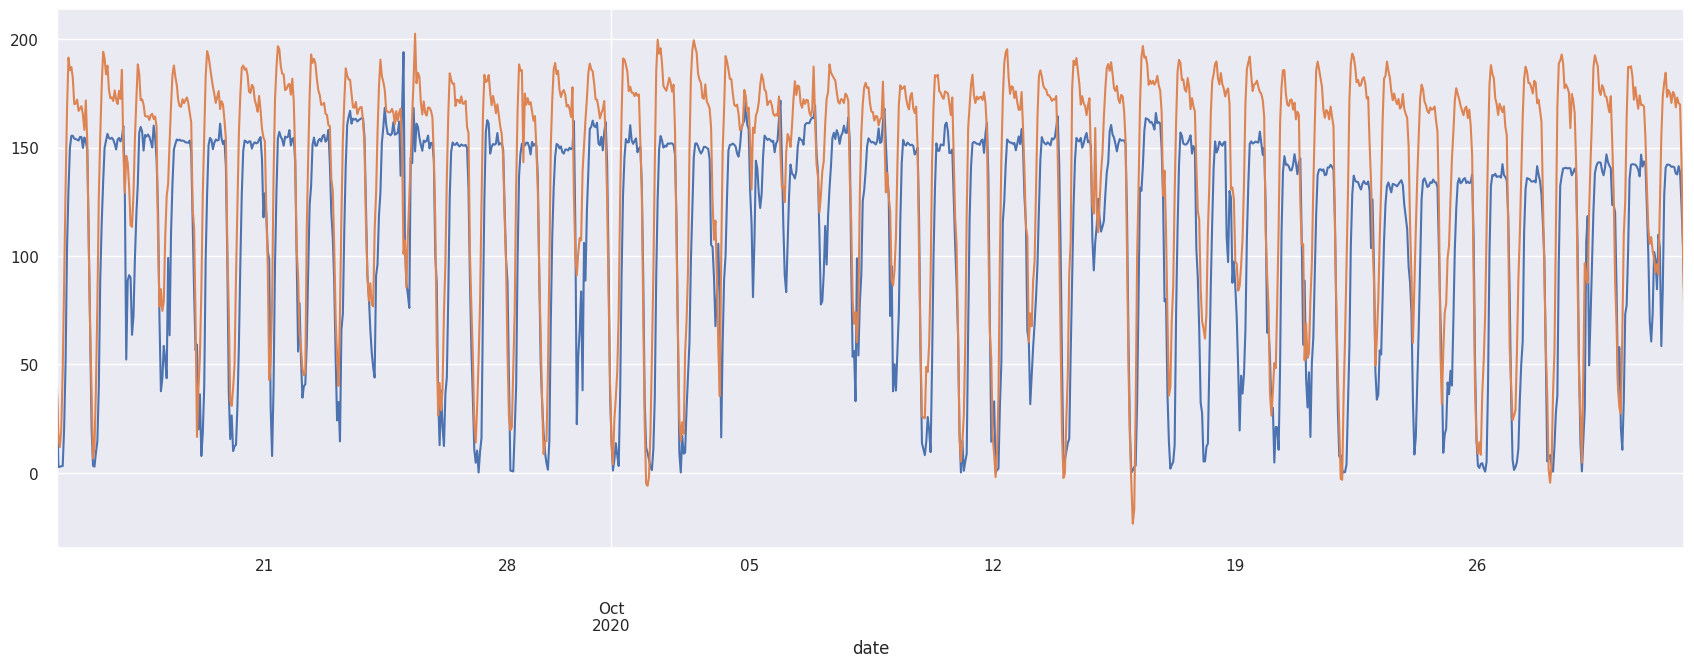

In [8]:
predictions = predict_model(best, data=df_hour)

sns.set(rc={'figure.figsize':(21, 7)})
ax = (df_hour.Building0['2020-09-15':].plot(linestyle='-')), (predictions.Label['2020-09-15':].plot(linestyle='-'))

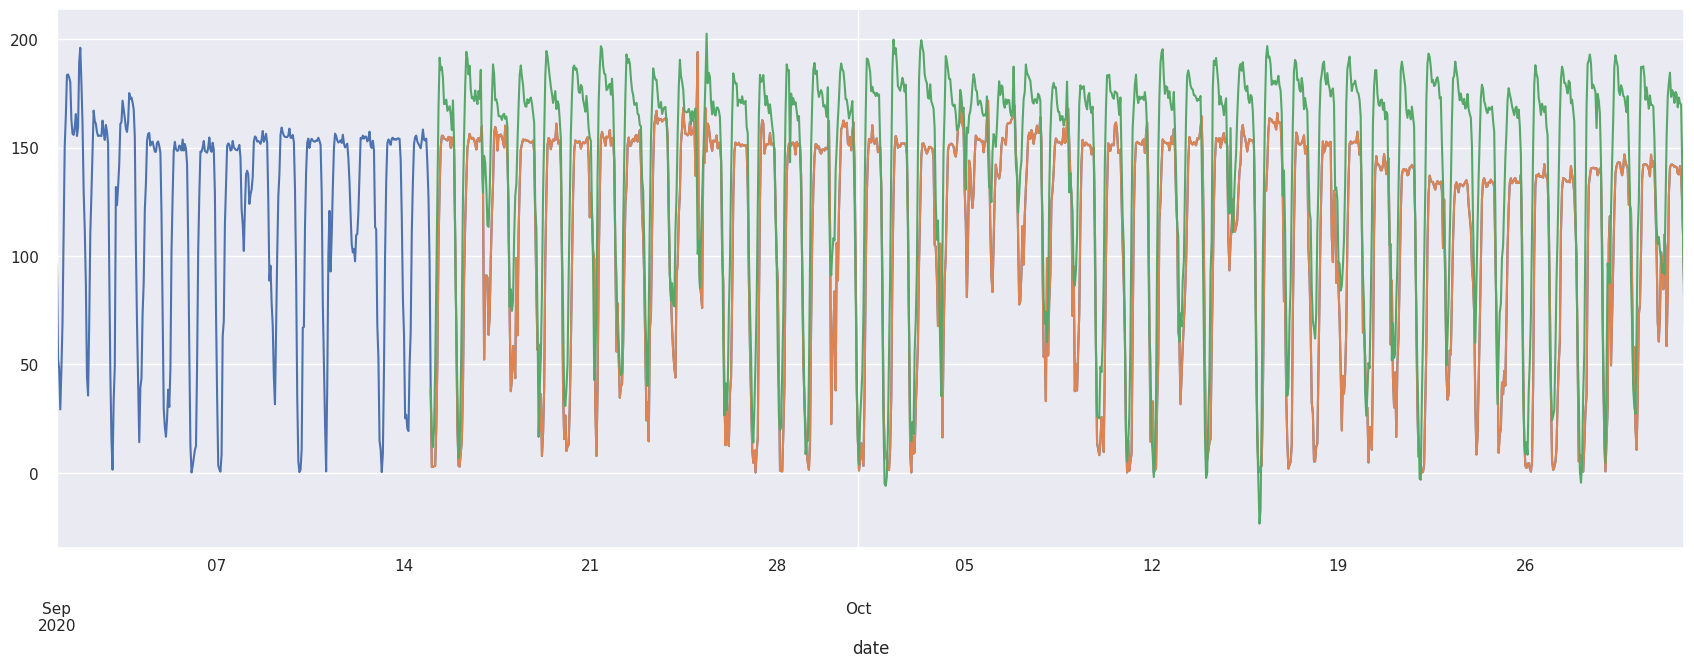

In [9]:
sns.set(rc={'figure.figsize':(21, 7)})
ax = (df_hour.Building0['2020-09-01':].plot(linestyle='-')), \
     (predictions.Building0['2020-09-15':].plot(linestyle='-')), \
     (predictions.Label['2020-09-15':].plot(linestyle='-'))

In [10]:
predictions[['Building0', 'Label']]

,Building0,Label
date,,
2019-09-24 00:00:00,193.0,218.660919
2019-09-24 01:00:00,173.9,218.528854
2019-09-24 02:00:00,156.3,224.193954
2019-09-24 03:00:00,134.4,240.149963
2019-09-24 04:00:00,159.8,255.635101
...,...,...
2020-10-31 19:00:00,141.4,170.502045
2020-10-31 20:00:00,138.5,169.816360
2020-10-31 21:00:00,123.0,142.633377


In [11]:
final_best = finalize_model(best)

## November forecast

In [12]:
predictions_future = predict_model(final_best, data=Nov_hour)
predictions_future.Label.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Elastic Net,0,0,0,0,0,0


date
2020-11-01 00:00:00    107.013062
2020-11-01 01:00:00     85.087738
2020-11-01 02:00:00     74.727997
2020-11-01 03:00:00     77.329285
2020-11-01 04:00:00     86.338654
Freq: H, Name: Label, dtype: float32

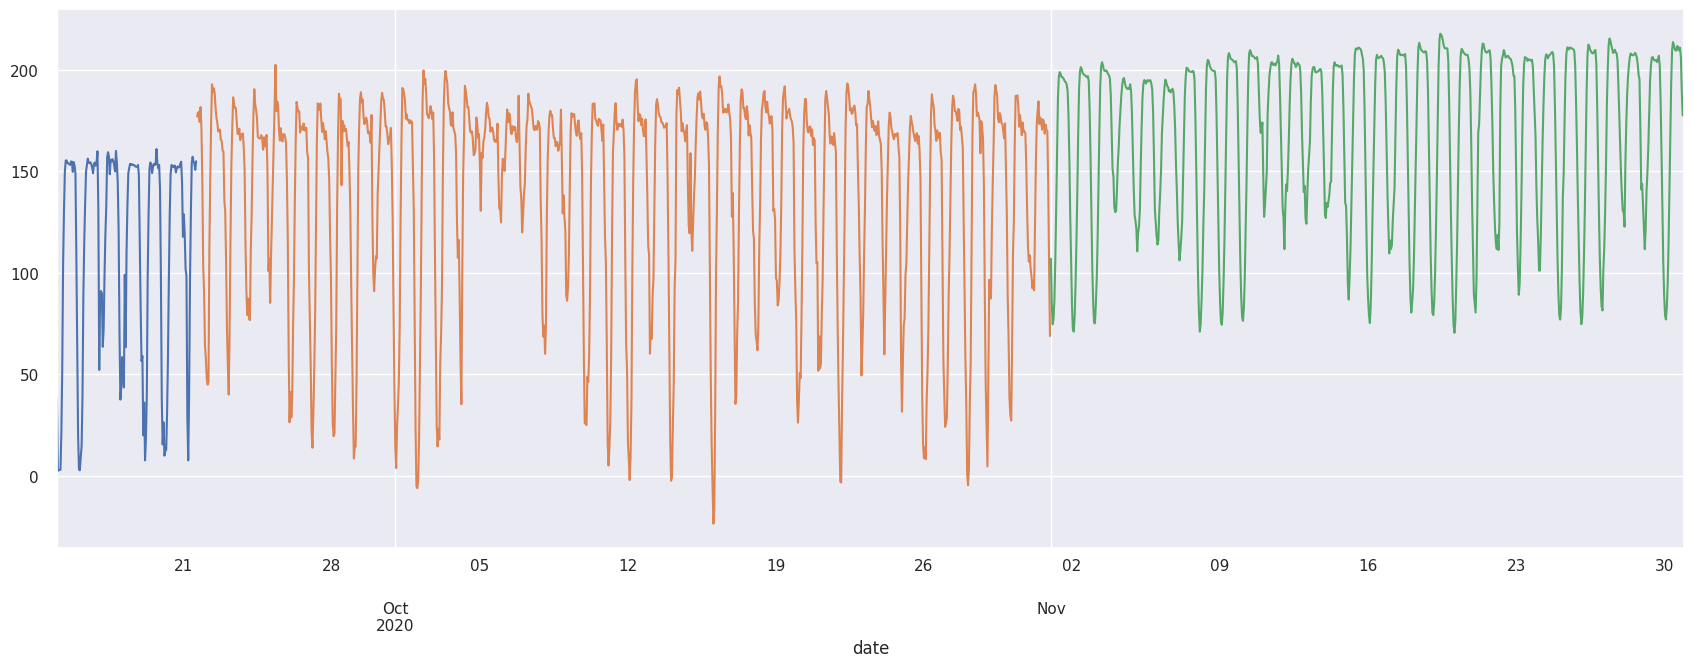

In [13]:
sns.set(rc={'figure.figsize':(21, 7)})
ax = (y_train.Building0['2020-09-15':].plot(linestyle='-')), \
     (predictions.Label['2020-09-21 15:00:00':].plot(linestyle='-')), \
     (predictions_future.Label.plot(linestyle='-'))

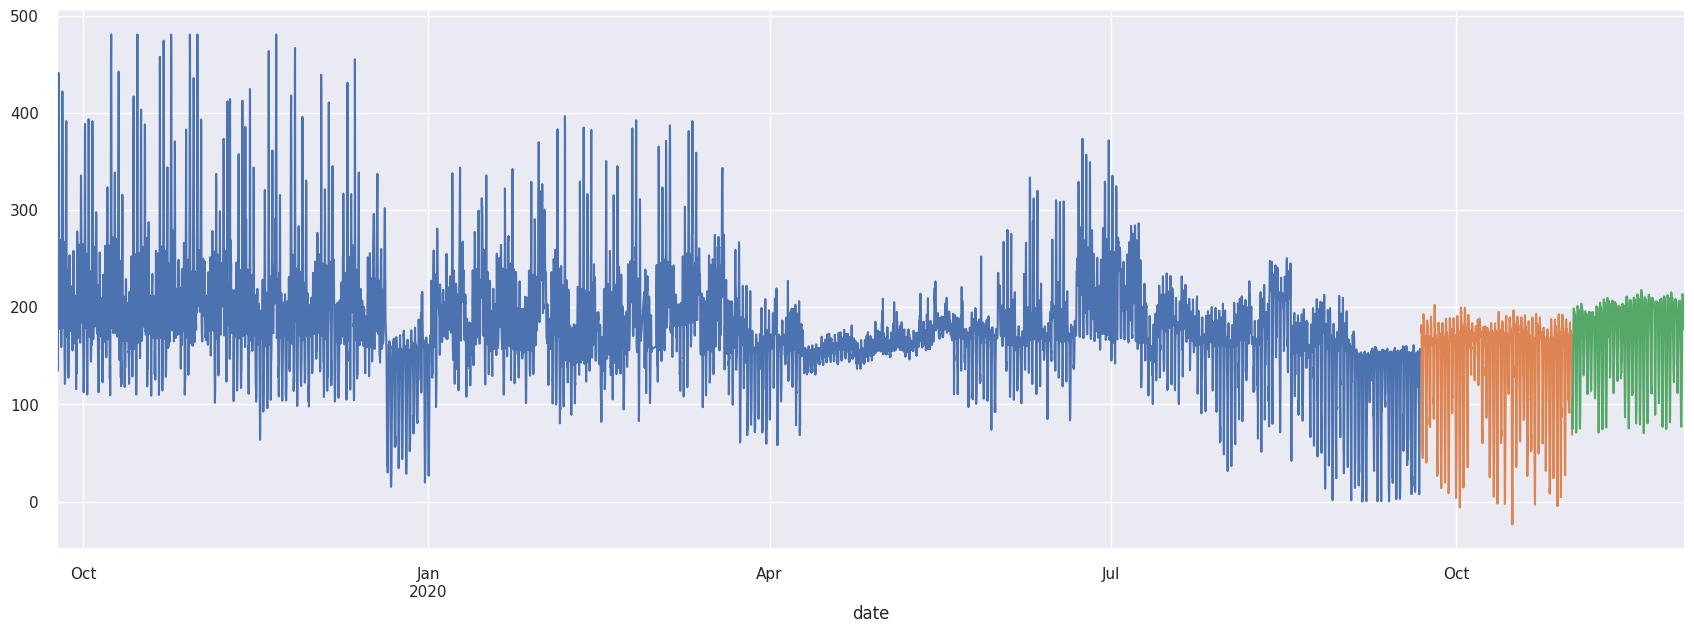

In [14]:
sns.set(rc={'figure.figsize':(21, 7)})
ax = (y_train.Building0['2019-09-01':].plot(linestyle='-')), \
     (predictions.Label['2020-09-21 15:00:00':].plot(linestyle='-')), \
     (predictions_future.Label.plot(linestyle='-'))

### Solar panels

In [15]:
y_train_S = df_hour['2020-05-21 05:00:00':'2020-10-15 14:00:00']
y_test_S = df_hour['2020-10-15 15:00:00':]

print(y_train.shape, y_test.shape)
y_train_S.shape[0] + y_test_S.shape[0]

(8727, 28) (969, 28)


3931

In [16]:
s_S = setup(data=y_train_S, test_data=y_test_S, target='Solar0', fold_strategy='timeseries', 
          fold=3, transform_target=False, session_id=1234)

,Description,Value
0,session_id,1234
1,Target,Solar0
2,Original Data,"(3538, 28)"
3,Missing Values,False
4,Numeric Features,19
5,Categorical Features,8
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(3538, 86)"


In [27]:
best_S = compare_models(sort='MAPE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,1.2321,7.4356,2.6026,0.9357,0.1844,0.5395,0.5233
dt,Decision Tree Regressor,1.2687,7.7966,2.6733,0.9314,0.2332,0.5598,0.0667
rf,Random Forest Regressor,1.1600,6.1973,2.4122,0.9415,0.1904,0.5618,0.9367
gbr,Gradient Boosting Regressor,1.0149,4.7653,2.1388,0.9529,0.1860,2.6319,0.4933
lightgbm,Light Gradient Boosting Machine,1.1989,6.9183,2.5411,0.9353,0.1976,3.0961,0.1467
lasso,Lasso Regression,1.2570,6.6179,2.4569,0.9403,0.1937,4.9793,0.5300
en,Elastic Net,1.2473,6.5031,2.4334,0.9417,0.1930,5.2535,0.0467
knn,K Neighbors Regressor,3.0350,35.5929,5.7281,0.6671,0.5817,9.9326,0.0800
br,Bayesian Ridge,1.2181,5.0365,2.1630,0.9494,0.3229,21.1277,0.0533
ridge,Ridge Regression,1.1965,4.8456,2.1170,0.9506,0.3301,21.4266,0.0467


In [36]:
predictions_S = predict_model(best_S, data=df_hour)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,4.4696,99.7671,9.9883,-0.8508,1.4306,0.0800


In [ ]:
sns.set(rc={'figure.figsize':(21, 7)})
ax = (y_test_S.Solar0.plot(linestyle='-')), (predictions_S.Label['2020-10-15':].plot(linestyle='-'))

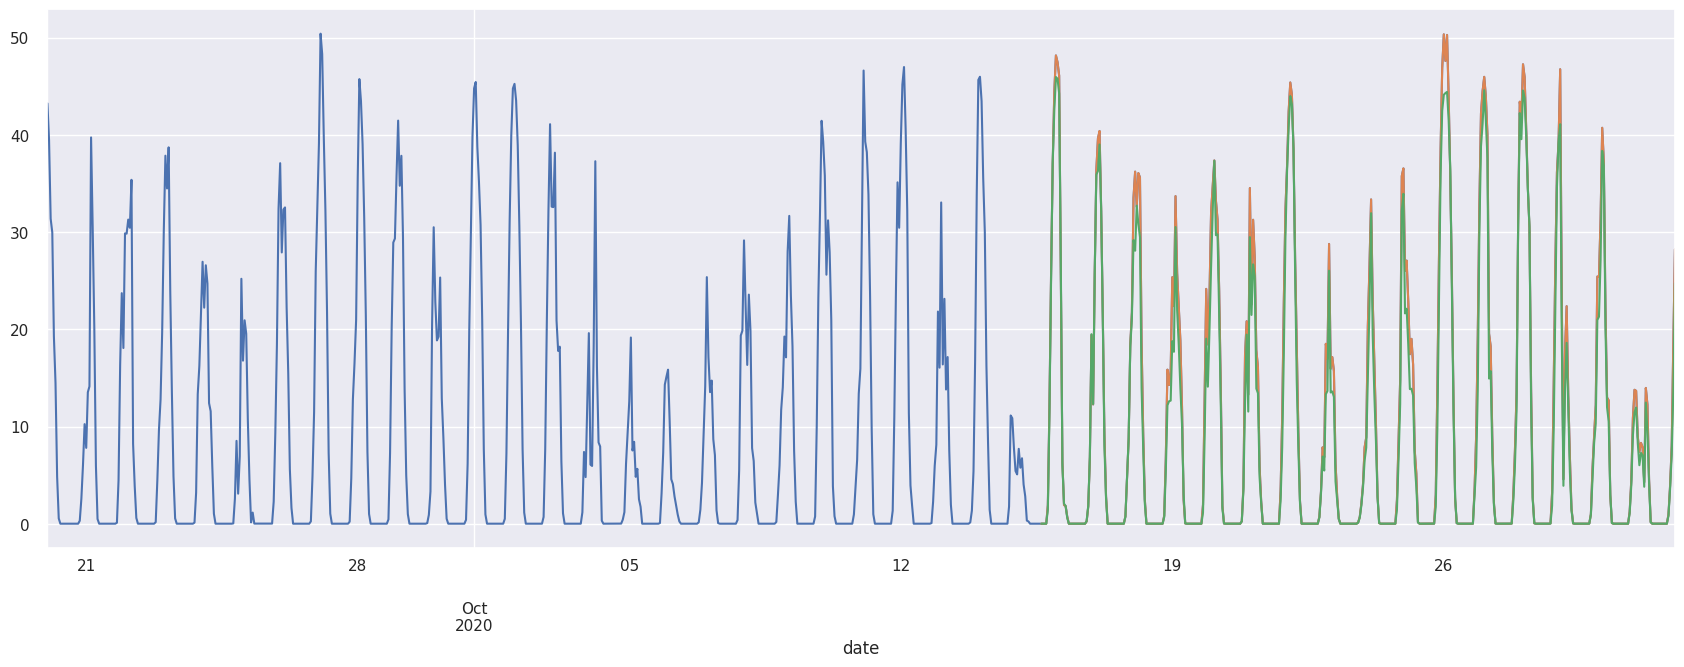

In [29]:
sns.set(rc={'figure.figsize':(21, 7)})
ax = (df_hour.Solar0['2020-09-20':].plot(linestyle='-')), \
     (df_hour.Solar0['2020-10-15 15:00:00':].plot(linestyle='-')), \
     (predictions_S.Label['2020-10-15 15:00:00':].plot(linestyle='-'))

In [30]:
predictions_S[['Solar0', 'Label']]['2020-10-15 15:00:00':]

,Solar0,Label
date,,
2020-10-15 15:00:00,0.01,0.0100
2020-10-15 16:00:00,0.01,0.0100
2020-10-15 17:00:00,0.01,0.0100
2020-10-15 18:00:00,0.01,0.0100
2020-10-15 19:00:00,1.90,1.4455
...,...,...
2020-10-31 19:00:00,0.95,0.8191
2020-10-31 20:00:00,3.91,3.6081
2020-10-31 21:00:00,8.00,7.1174


In [31]:
final_best_S = finalize_model(best_S)

## November forecast

In [32]:
predictions_future_S = predict_model(final_best_S, data=Nov_hour)
predictions_future_S.Label.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0,0,0,0,0,0


date
2020-11-01 00:00:00    5.0462
2020-11-01 01:00:00    5.0065
2020-11-01 02:00:00    4.9994
2020-11-01 03:00:00    4.8768
2020-11-01 04:00:00    4.8417
Freq: H, Name: Label, dtype: float64

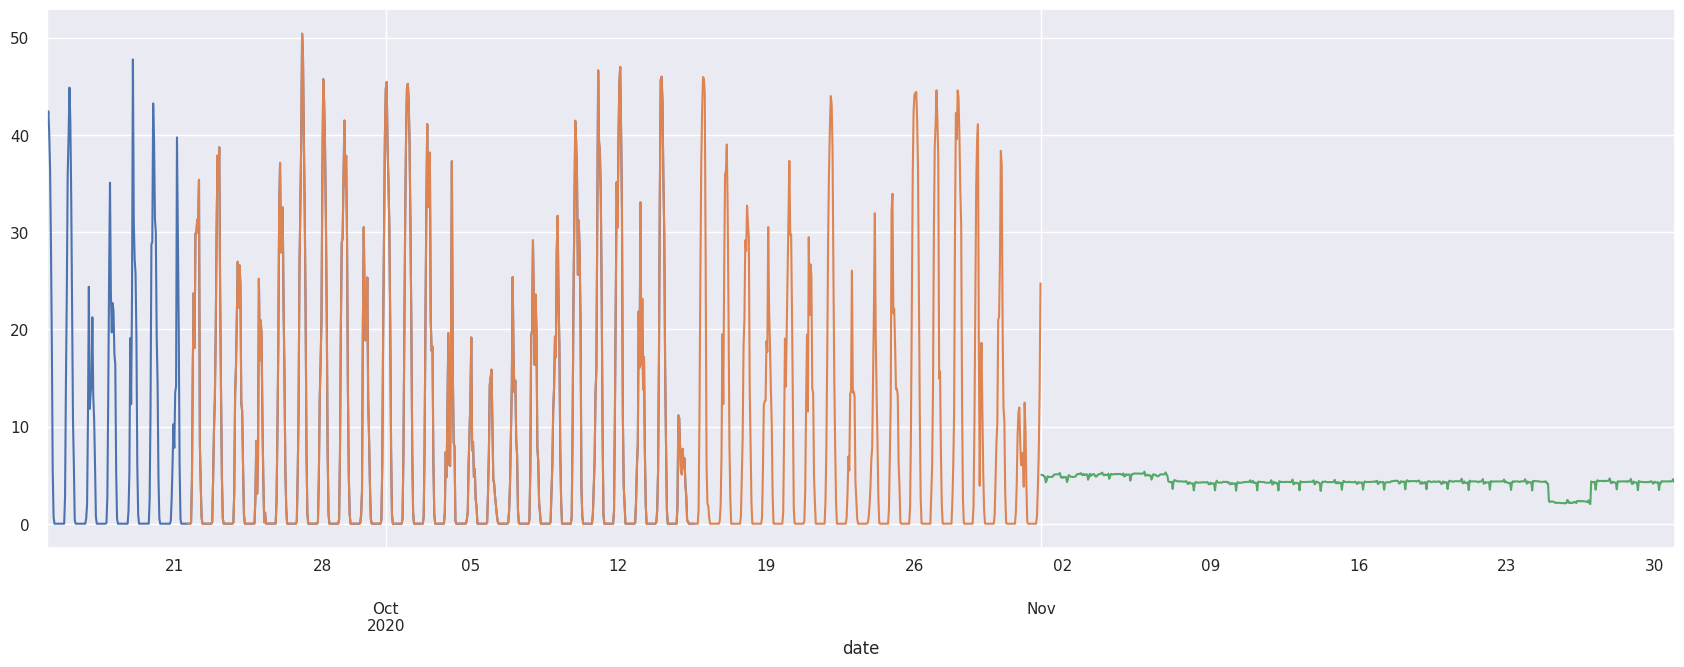

In [33]:
sns.set(rc={'figure.figsize':(21, 7)})
ax = (y_train_S.Solar0['2020-09-15':].plot(linestyle='-')), \
     (predictions_S.Label['2020-09-21 15:00:00':].plot(linestyle='-')), \
     (predictions_future_S.Label.plot(linestyle='-'))

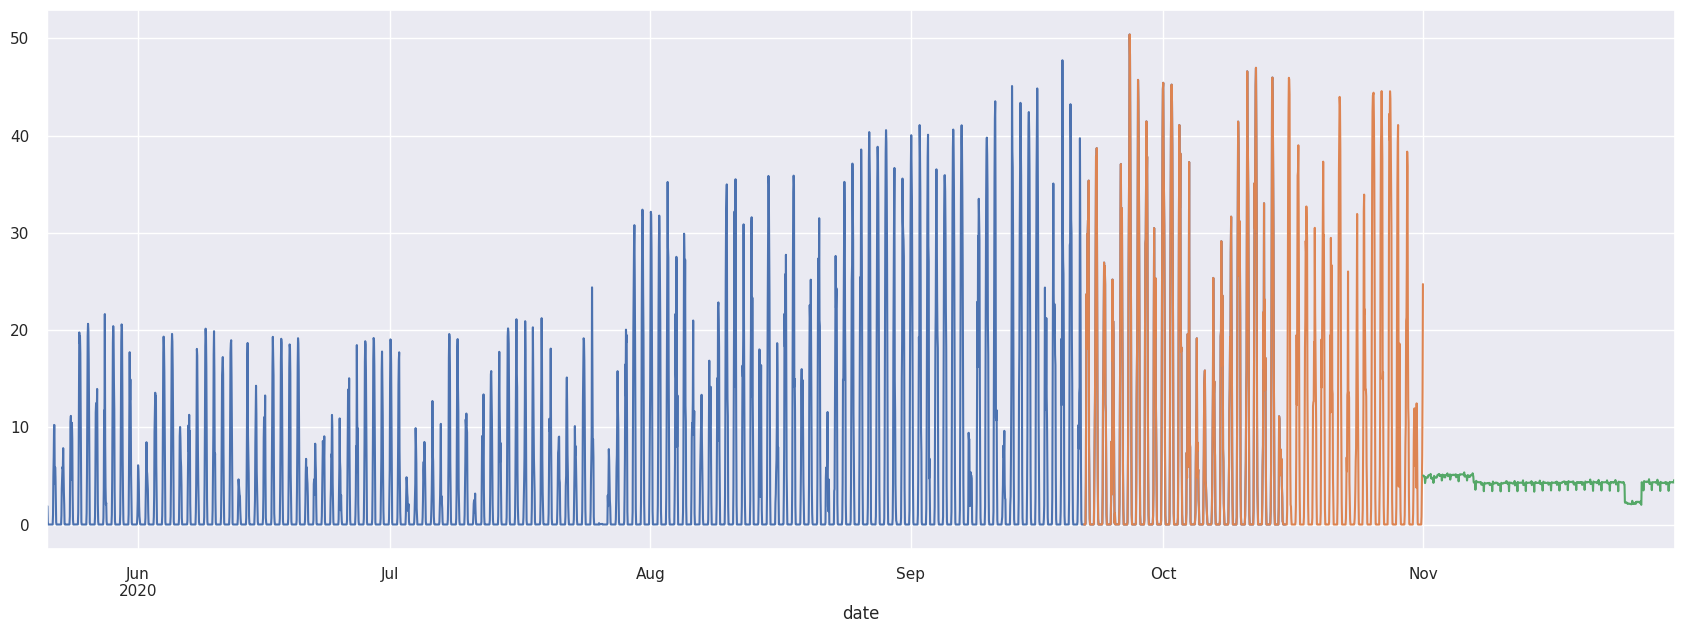

In [34]:
sns.set(rc={'figure.figsize':(21, 7)})
ax = (y_train_S.Solar0['2019-09-01':].plot(linestyle='-')), \
     (predictions_S.Label['2020-09-21 15:00:00':].plot(linestyle='-')), \
     (predictions_future_S.Label.plot(linestyle='-'))